In [130]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

from sklearn.metrics import accuracy_score

In [2]:
train = pd.read_csv('fashion-mnist_train.csv')
train

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59995,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59996,1,0,0,0,0,0,0,0,0,0,...,73,0,0,0,0,0,0,0,0,0
59997,8,0,0,0,0,0,0,0,0,0,...,160,162,163,135,94,0,0,0,0,0
59998,8,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [3]:
test = pd.read_csv('fashion-mnist_test.csv')
test

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0,0,0,0,0,0,0,0,9,8,...,103,87,56,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,34,0,0,0,0,0,0,0,0,0
2,2,0,0,0,0,0,0,14,53,99,...,0,0,0,0,63,53,31,0,0,0
3,2,0,0,0,0,0,0,0,0,0,...,137,126,140,0,133,224,222,56,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0,0,0,0,0,0,0,0,0,0,...,32,23,14,20,0,0,1,0,0,0
9996,6,0,0,0,0,0,0,0,0,0,...,0,0,0,2,52,23,28,0,0,0
9997,8,0,0,0,0,0,0,0,0,0,...,175,172,172,182,199,222,42,0,1,0
9998,8,0,1,3,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


In [7]:
X_train = train.iloc[:,train.columns != 'label']
y_train = train.iloc[:,train.columns == 'label']
X_train.shape, y_train.shape

((60000, 784), (60000, 1))

In [8]:
X_test = test.iloc[:,test.columns != 'label']
y_test = test.iloc[:,test.columns == 'label']
X_test.shape, y_test.shape

((10000, 784), (10000, 1))

In [11]:
X_test.dtypes

pixel1      int64
pixel2      int64
pixel3      int64
pixel4      int64
pixel5      int64
            ...  
pixel780    int64
pixel781    int64
pixel782    int64
pixel783    int64
pixel784    int64
Length: 784, dtype: object

In [12]:
X_test

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0,0,0,0,0,0,0,9,8,0,...,103,87,56,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,34,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,14,53,99,17,...,0,0,0,0,63,53,31,0,0,0
3,0,0,0,0,0,0,0,0,0,161,...,137,126,140,0,133,224,222,56,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0,0,0,0,0,0,0,0,0,37,...,32,23,14,20,0,0,1,0,0,0
9996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,2,52,23,28,0,0,0
9997,0,0,0,0,0,0,0,0,0,0,...,175,172,172,182,199,222,42,0,1,0
9998,0,1,3,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


In [13]:
X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0

In [14]:
# Reshaping image to size 28 * 28 * 1
X_train_reshaped = X_train.values.reshape(-1,28,28,1)
X_test_reshaped = X_test.values.reshape(-1,28,28,1)

In [16]:
X_train_reshaped.shape, X_test_reshaped.shape

((60000, 28, 28, 1), (10000, 28, 28, 1))

In [18]:
model = Sequential() 

In [19]:
model.add(Conv2D(filters=64, kernel_size=(3,3), activation='relu', input_shape=(28,28,1)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(units=128, activation='relu'))
model.add(Dense(units=10,activation='softmax'))
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 64)        640       
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 64)        0         
 D)                                                              
                                                                 
 flatten (Flatten)           (None, 10816)             0         
                                                                 
 dense (Dense)               (None, 128)               1384576   
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 1386506 (5.29 MB)
Trainable params: 1386506 (5.29 MB)
Non-trainable params: 0 (0.00 Byte)
__________________

In [20]:
history = model.fit(X_train_reshaped, y_train, epochs=10, validation_split=0.05)

Epoch 1/10


2024-04-28 16:08:54.891770: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 178752000 exceeds 10% of free system memory.


1782/1782 [==============================] - 65s 36ms/step - loss: 0.3861 - accuracy: 0.8636 - val_loss: 0.3110 - val_accuracy: 0.8893
Epoch 2/10
1782/1782 [==============================] - 66s 37ms/step - loss: 0.2593 - accuracy: 0.9056 - val_loss: 0.2653 - val_accuracy: 0.9057
Epoch 3/10
1782/1782 [==============================] - 65s 37ms/step - loss: 0.2108 - accuracy: 0.9221 - val_loss: 0.2597 - val_accuracy: 0.9057
Epoch 4/10
1782/1782 [==============================] - 62s 35ms/step - loss: 0.1743 - accuracy: 0.9363 - val_loss: 0.2678 - val_accuracy: 0.9127
Epoch 5/10
1782/1782 [==============================] - 65s 37ms/step - loss: 0.1463 - accuracy: 0.9462 - val_loss: 0.2527 - val_accuracy: 0.9163
Epoch 6/10
1782/1782 [==============================] - 63s 36ms/step - loss: 0.1214 - accuracy: 0.9553 - val_loss: 0.2567 - val_accuracy: 0.9183
Epoch 7/10
1782/1782 [==============================] - 65s 36ms/step - loss: 0.1004 - accuracy: 0.9634 - val_loss: 0.2722 - val_accura

In [40]:
y_train.iloc[3,:].values[0]

0

In [52]:
X_train_reshaped

784

[2, 9, 6, 0, 3, 4, 5, 8, 7, 1]

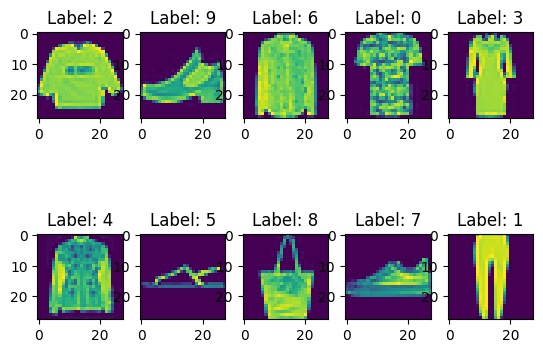

In [59]:
# Finding all the unique labels
labels = []
r = 0
while len(labels) < 10:
    label = y_train.iloc[r,:].values[0]
    if label not in labels:
        labels.append(label)
        plt.subplot(2,5,len(labels))
        plt.title(f'Label: {label}')
        plt.imshow(X_train_reshaped[r])
    r += 1
    
labels

In [60]:
# Assigning labels based on images 
label_names = {
    0 : 't-shirt',
    1 : 'trousers',
    2 : 'sweat-shirt',
    3 : 'gown',
    4 : 'jacket',
    5 : 'slippers',
    6 : 'shirt',
    7 : 'sneakers',
    8 : 'hand-bag',
    9 : 'ankle-boot'
}

In [146]:
def predict(id):
    entry = X_test_reshaped[id:id+1]
    
    pred = model.predict(entry)
    label = label_names[np.argmax(pred)]
    
    print(label)
    plt.imshow(X_test_reshaped[id])
    

1/1 [==============================] - 0s 17ms/step
t-shirt


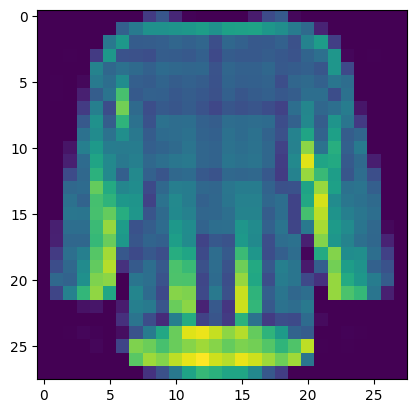

In [147]:
predict(1040)

In [105]:
y_pred_prob = model.predict(X_test_reshaped)

313/313 [==============================] - 2s 5ms/step


In [106]:
y_pred_prob.shape, y_test.shape

((10000, 10), (10000, 1))

In [121]:
y_test

,label
0,0
1,1
2,2
3,2
4,3
...,...
9995,0
9996,6
9997,8
9998,8


In [112]:
np.argmax(y_pred_prob[0])

0

In [115]:
y_pred = []
for i in range(len(y_pred_prob)):
    y_pred.append(np.argmax(y_pred_prob[i]))

In [127]:
y_pred = pd.DataFrame(y_pred)
y_pred

,0
0,0
1,1
2,6
3,2
4,3
...,...
9995,0
9996,6
9997,8
9998,8


(      label
 0         0
 1         1
 2         2
 3         2
 4         3
 ...     ...
 9995      0
 9996      6
 9997      8
 9998      8
 9999      1
 
 [10000 rows x 1 columns],
       0
 0     0
 1     1
 2     6
 3     2
 4     3
 ...  ..
 9995  0
 9996  6
 9997  8
 9998  8
 9999  1
 
 [10000 rows x 1 columns])

In [132]:
acc = accuracy_score(y_test,y_pred)
print(f'Accuracy: {acc*100}')

Accuracy: 92.27


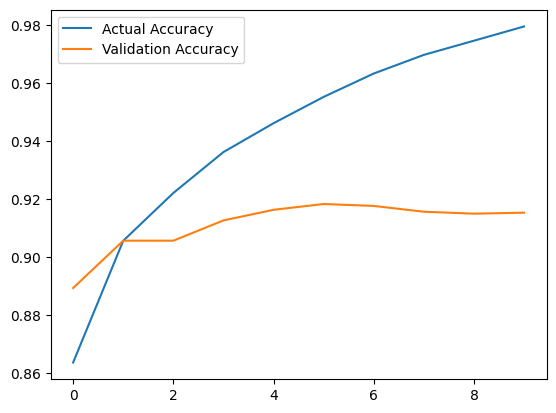

In [148]:
plt.plot(history.history['accuracy'], label='Actual Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()

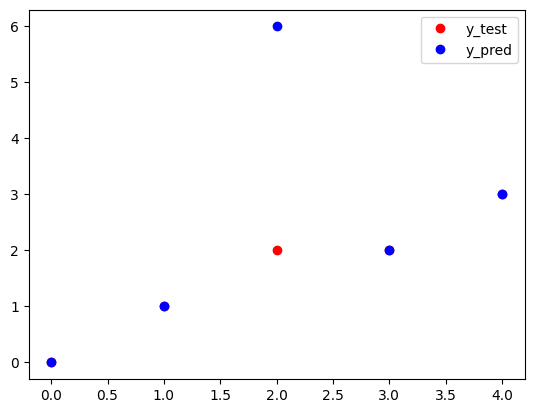

In [150]:
plt.plot(y_test.head(),'ro', label='y_test')
plt.plot(y_pred.head(),'bo', label='y_pred')
plt.legend()